In [5]:
from sklearn import tree
import pydotplus 
import numpy as np

In [67]:
import pandas as pd

In [95]:
data = pd.read_csv('german.data-numeric', delim_whitespace=True, header=None)
data_X = data.iloc[:,:-1]
data_y = data.iloc[:,-1]

In [96]:
model = tree.DecisionTreeClassifier()
model.fit(data_X, data_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [92]:
dot_data = tree.export_graphviz(model, out_file="tree.out",  
                         class_names=['Good', 'Bad'],  
                         filled=True, rounded=True,  
                         special_characters=True)

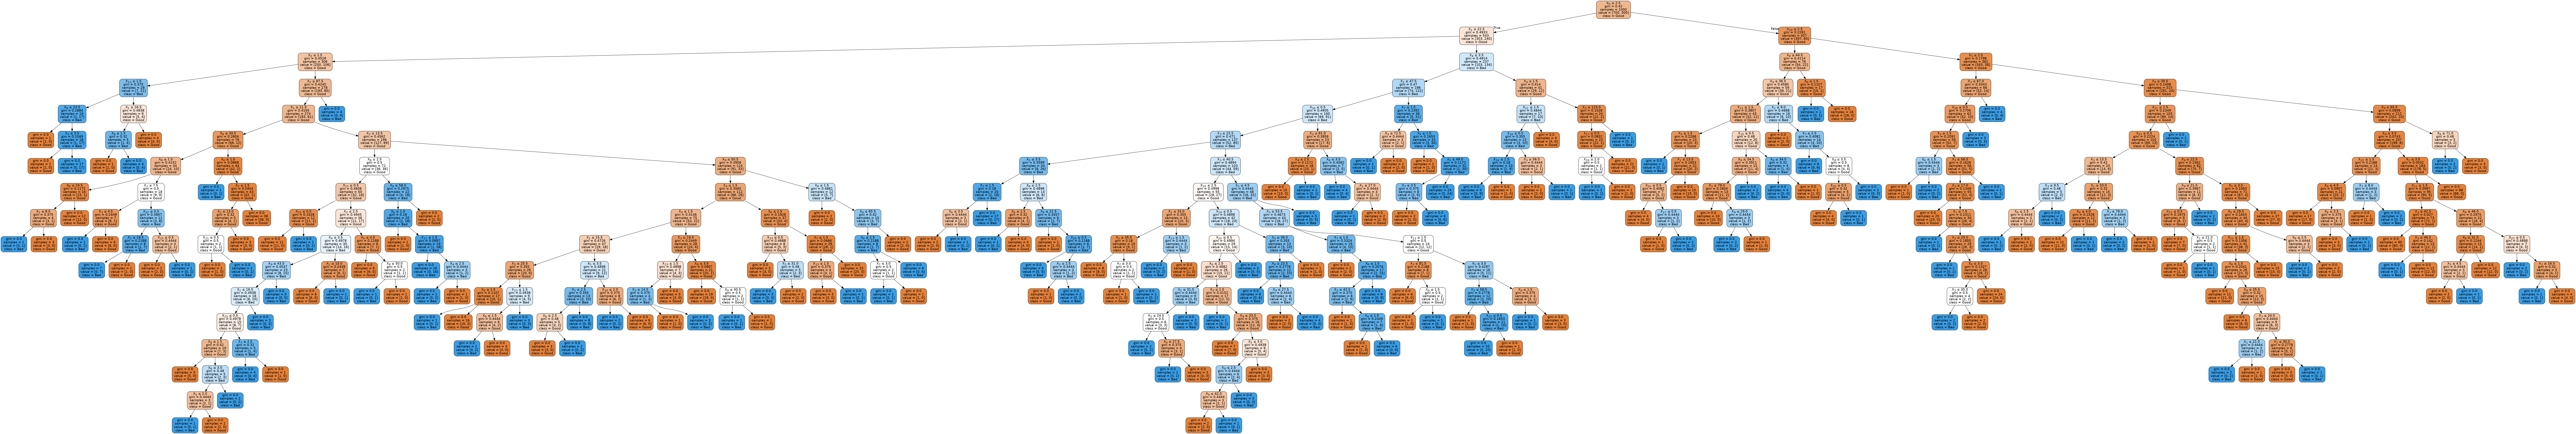

In [94]:
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())

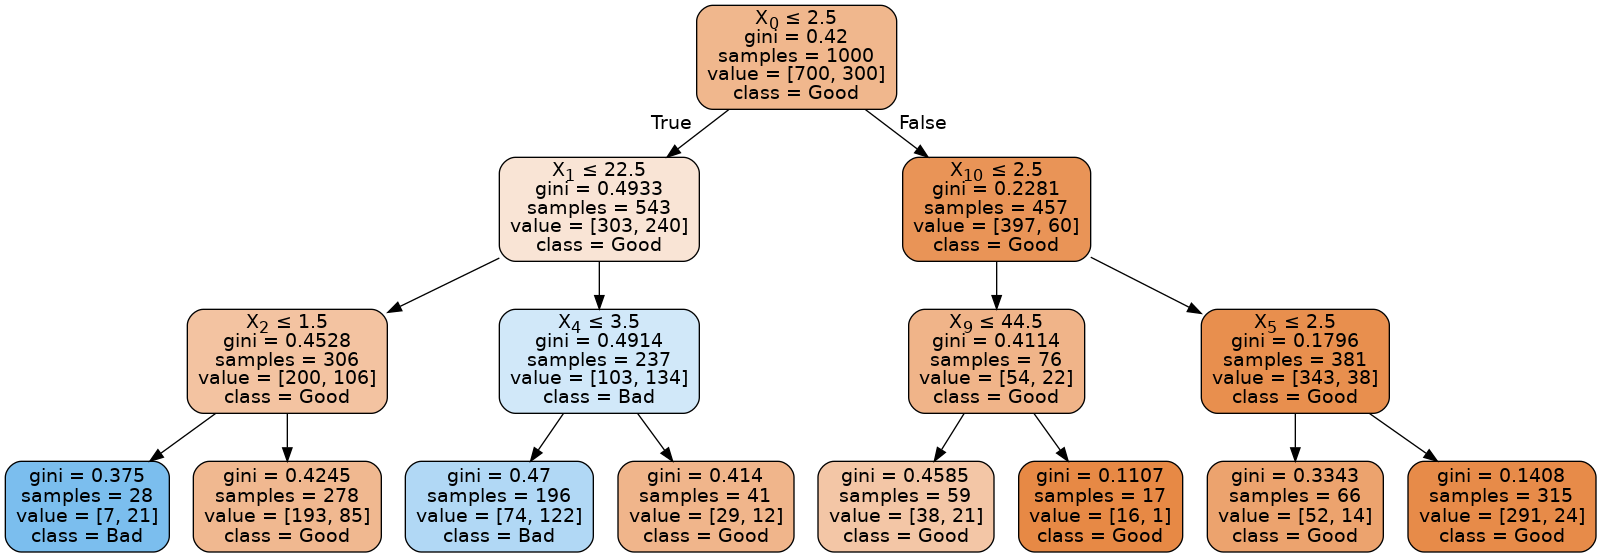

In [97]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(data_X, data_y)
dot_data = tree.export_graphviz(model, out_file="tree.out",  
                         class_names=['Good', 'Bad'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())

X0 - salary assignements

X1 - Duration in month 

X2 - Credit history 

X4 - Purpose 


Интерпретация: Если нет аккаунта или заработная плата за последний год не мене 200DM, то кредит выдаётся. Если нет, смотрим на продолжительность кредита, если 22 месяца и менее, то учитывается кредитная история, если на более длительный срок, то учитывается цель.

In [105]:
from sklearn.cross_validation import cross_val_score
from matplotlib import pyplot as plt
%matplotlib inline

# Оценка качества на кросс-валидации

In [109]:
val_score = []
depth = range(2, 30)
for d in depth:
    model = tree.DecisionTreeClassifier(max_depth=d)
    val_score.append(cross_val_score(model, data_X, data_y).mean())

# Оценка качества на обучающей выборке

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
acc_score = []
for d in depth:
    model = tree.DecisionTreeClassifier(max_depth=d)
    model.fit(data_X, data_y)
    acc_score.append(accuracy_score(data_y, model.predict(data_X)))    

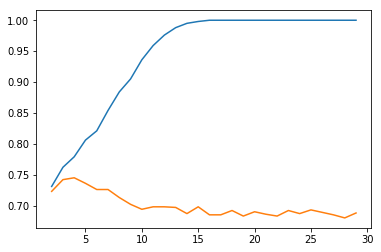

In [110]:
pl1, = plt.plot(depth, acc_score, label = 'cross val')
pl2, = plt.plot(depth, val_score, label = 'train data')
plt.